<a href="https://colab.research.google.com/github/Jonipeloni/musicgeneration/blob/main/Aktuell_Dienstag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import shutil
import numpy as np
import pretty_midi
import pathlib
import collections
from miditok import REMI

#import datetime<
#import fluidsynth
#import glob
#import pretty_midi
#import seaborn as sns




# Loading Data

In [19]:
data_dir = pathlib.Path('maestro-v2.0.0')

# Teilmenge des Datasets wählen

#

In [20]:
import glob
paths = glob.glob("maestro-v2.0.0/2004/*.mid*")# + glob.glob("maestro-v2.0.0/2006/*.mid*") + glob.glob("maestro-v2.0.0/2008/*.mid*")

In [21]:
print(paths)

['maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_10_Track10_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_02_Track02_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_03_Track03_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_05_R1_2004_02-03_ORIG_MID--AUDIO_05_R1_2004_06_Track06_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_02_Track02_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_04_Track04_wav.midi', 'maestro-v2.0.0/2004\\MIDI-Unp

In [5]:
import os
import pretty_midi

midi_files_dir = data_dir
output_dir = "selected_midi_files"  # Define the output directory
output_path = os.path.join(midi_files_dir, output_dir)

if not os.path.exists(output_path):
    os.makedirs(output_path)

# Criteria for selection
desired_time_signature = (4, 4)  # (numerator, denominator)
min_length_seconds = 100
max_length_seconds = 800

selected_files = []

# Iterate over all files in the directory
for filepath in paths:
    try:
        # Load the MIDI file
        midi_data = pretty_midi.PrettyMIDI(filepath)

        # Check time signatures
        time_signatures = midi_data.time_signature_changes
        has_desired_time_signature = any(ts.numerator == desired_time_signature[0] and
                                            ts.denominator == desired_time_signature[1]
                                            for ts in time_signatures)

        # Check length
        length = midi_data.get_end_time()  # This returns the length in seconds
        if has_desired_time_signature and min_length_seconds <= length <= max_length_seconds:
            # Construct output file path
            
            # Copy the file to the output directory
            selected_files.append(filepath)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

# Print or use the selected files
for file in selected_files:
    print(file)


maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_10_Track10_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_03_Track03_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_05_R1_2004_02-03_ORIG_MID--AUDIO_05_R1_2004_06_Track06_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_02_Track02_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_06_Track06_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_12_Track12_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_07_Track07_wav.midi
maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID-

In [7]:
from miditok import REMI
from pathlib import Path


# Creates the tokenizer and list the file paths
tokenizer = REMI(sos_eos=True)
midi_paths = selected_files

# Converts MIDI files to tokens saved as JSON files
tokenizer.tokenize_midi_dataset(
    midi_paths,
    Path('data/only2004')
)

# Learns the vocabulary with BPE


Tokenizing MIDIs (data/only2004): 100%|██████████| 101/101 [00:36<00:00,  2.77it/s]


In [10]:
tokenizer.learn_bpe(
    'data/only2004',
    512,
    'data/only2004_BPE'
)

# Converts the tokenized musics into tokens with BPE
tokenizer.apply_bpe_to_dataset(Path('data/only2004'), Path('data/only2004_BPE'))

Loading token files: 100%|██████████| 101/101 [00:00<00:00, 400.84it/s]
Learning byte pair encoding: 292it [06:06,  1.26s/it, seq_len_variation=-30.73, avg_nb_token_combs=2.51, max_nb_token_combs=3]


Mean of original lengths: 15497.50495049505
Mean length after BPE: 10734.356435643564
Variation from original: -30.73 %


Applying BPE to dataset: 100%|██████████| 101/101 [01:00<00:00,  1.66it/s]


## save tokenizer

In [11]:
import pickle

# Assuming 'tokenizer' is your REMI tokenizer after it has learned BPE
with open('tokenizer_bpe.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [12]:
print(tokenizer.len)

512


In [13]:
print(type(tokens))

NameError: name 'tokens' is not defined

## apply to all

In [ ]:
tokenizer.apply_bpe_to_dataset(Path('data/only2004'), Path('data/only2004_BPE'))

# Putting the tokens in the right format (numpy arrays)

In [17]:
import json
import numpy as np
import os
from pathlib import Path

output_folder = Path("tokenized_data")
output_folder.mkdir(parents=True, exist_ok=True)

# Turns all the json files from tokenization in a folder into numpy arrays
def json_to_nparray(path):
    for filename in os.listdir(path):
        if filename.endswith('.json'):
            with open(path + '/' + filename, "r") as f:
                data = json.load(f)
                np.save(output_folder / (filename[:-5] + '.npy'), np.array(data))  # Corrected the save path
        continue

json_to_nparray("data/only2004_BPE")

In [11]:
def get_tokens(path): # function to get all tokens from the dataset and put them in a numpy array
    to_shuffle = np.array(()) # to_shuffle aggregator for one piece
    data = np.array(()) # data aggregator for one piece
    piece_counter = 0

    for filename in os.listdir(path):
        if filename.endswith('.npy'):
            to_shuffle = np.append(to_shuffle, np.load(path + filename, allow_pickle=True)[()])
    np.random.shuffle(to_shuffle)

    for i in range(len(to_shuffle)):
        data = np.append(data, 1)
        for j in range(len(to_shuffle[i].get('tokens'))):
            data = np.append(data, to_shuffle[i].get('tokens')[j])
        data = np.append(data, 2)
        piece_counter += 1

    return data, piece_counter
path_tokens_BPE = "/content/data/BPE_tokenized_data/"
tokens, piece_counter = get_tokens(path_tokens_BPE)

np.save(path_tokens_BPE, tokens)

# Plot

Number of tokens: 512
Missing tokens: {0, 188, 121, 122, 123, 92}


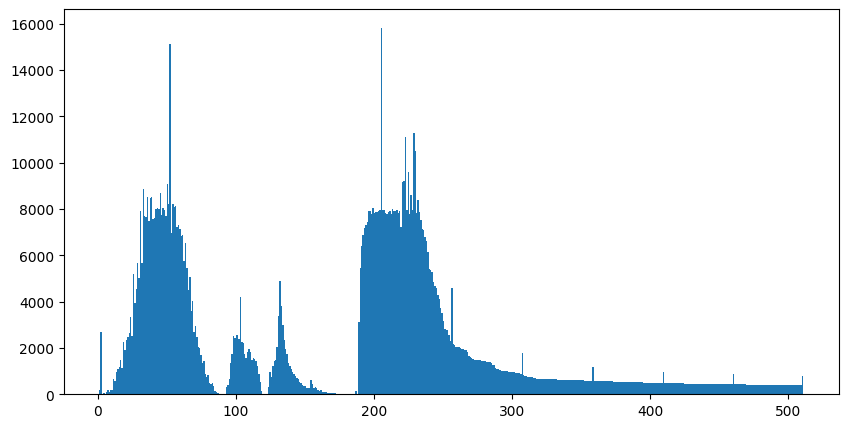

In [12]:
import matplotlib.pyplot as plt
# plot the distribution of the tokens
print(f'Number of tokens: {tokenizer.len}')
print(f'Missing tokens: {set(range(0, 512))-set(tokens)}')

plt.figure(figsize=(10, 5))
plt.hist(tokens, bins=500)
plt.show()





```

# Hier der Transformer

In [15]:
import tensorflow as tf
import numpy as np
# from keras_mlp.layers import ReversibleEmbedding

class PosEncode(tf.keras.layers.Layer):
    def __init__(self,dims,  max_sep_len,):
        super(PosEncode, self).__init__()
        self.max_sep_len = max_sep_len
        self.pos_enc = self._pos_enc(max_sep_len, dims)

    #Add the Embeddings and the Encodings

    def _pos_enc(self, length, dims):
        pos = np.arange(length)[:, np.newaxis]
        j = np.arange(dims)[np.newaxis, :]
        #distribute the angles according to the formula for Positional Encodings
        angle_rates = 1 / np.power(10000, (2 * j)/ dims)
        angle_rads = pos * angle_rates
        #even coordinates get sin, odd coordinates get cos
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    @tf.function
    def call(self, x):

        seq_len = x.shape[1]
        return tf.slice(self.pos_enc, [0, 0, 0], [-1, seq_len, -1])

class InverseEmbedding(tf.keras.layers.Embedding):

    def __init__(self, voc_size, dims,  **kwargs):
        super(InverseEmbedding, self).__init__(voc_size, dims, **kwargs)

    def call(self, x, inverse = False, training = True):
        if not inverse:
            return super().call(x)

        trans = tf.transpose(tf.convert_to_tensor(self.embeddings))
        return tf.matmul(x, trans)


class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, dims, num_heads, attn_size, dropout_prob):
        super(MultiHeadAttention, self).__init__()
        # Initialize the parameters
        self.num_heads = num_heads
        self.attn_size = attn_size
        self.dims = dims

        # Layers for QKV projection and output projection
        self.qkv_projection = tf.keras.layers.Dense(num_heads * attn_size * 3, use_bias=False)
        self.output_projection = tf.keras.layers.Dense(dims)
        self.dropout = tf.keras.layers.Dropout(dropout_prob)

    def call(self, qs, mask=None):
        # Compute batch size and sequence length from inputs
        batch_size = tf.shape(qs)[0]
        seq_length = tf.shape(qs)[1]

        # Project queries, keys, and values
        qkv = self.qkv_projection(qs)
        qkv = tf.reshape(qkv, [batch_size, seq_length, self.num_heads * 3, self.attn_size])
        qs, ks, vs = tf.split(qkv, 3, axis=2)

        # Compute scaled dot-product attention
        qs = tf.transpose(qs, [0, 2, 1, 3])
        ks = tf.transpose(ks, [0, 2, 3, 1])
        attn_product = tf.matmul(qs, ks) / tf.math.sqrt(tf.cast(self.attn_size, tf.float32))

        # Apply mask, if provided
        if mask is not None:
            mask = tf.expand_dims(mask, 1)
            mask = tf.expand_dims(mask, 2)
            mask = tf.broadcast_to(mask, [batch_size, self.num_heads, seq_length, seq_length])
            attn_product = tf.where(mask == 0, tf.fill(tf.shape(attn_product), -1e9), attn_product)

        # Softmax and dropout
        scores = tf.nn.softmax(attn_product, axis=-1)
        scores = self.dropout(scores)

        # Weighted sum of values
        vs = tf.transpose(vs, [0, 2, 1, 3])
        res = tf.matmul(scores, vs)

        # Reshape and project to output size
        res = tf.reshape(tf.transpose(res, [0, 2, 1, 3]), [batch_size, -1, self.num_heads * self.attn_size])
        output = self.output_projection(res)

        return output


class SubLayerLogic(tf.keras.layers.Layer):
    def __init__(self, d_model, dropout_rate):
        super(SubLayerLogic, self).__init__()

        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.norm = tf.keras.layers.LayerNormalization()

    def calls(self, x, sublayer):

        return x + self.dropout(sublayer(self.norm(x)))

class SelfAttentionBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dropout_rate):
        super(SelfAttentionBlock, self).__init__()
        self.ffn = tf.keras.layers.Dense(d_model, "silu")
        self.attention = MultiHeadAttention(d_model, num_heads,d_model//num_heads, dropout_rate)
        self.sub1 = SubLayerLogic(d_model, dropout_rate)
        self.sub2 = SubLayerLogic(d_model, dropout_rate)

    @tf.function
    def call(self, x, mask):
        x = self.sub1(x, lambda inputs : self.attention(inputs, mask))
        return self.sub2(x, self.attention)

class Transformer(tf.keras.Model):
    def __init__(self, voc_size, dims, maxseqlen, num_heads, dropout_rate, n_blocks):
        super(Transformer, self).__init__()

        self.posemb = PosEncode(dims, maxseqlen)
        self.embedding = InverseEmbedding(voc_size, dims)
        self.blocks = [
            SelfAttentionBlock(dims, num_heads, dropout_rate) for _ in range(n_blocks)
        ]

    def encode(self, x):

        return self.posemb(x) + self.embedding(x, inverse=False)

    def gen_mask(self, seq_len):
        return tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)[None,None,:]

    @tf.function
    def call(self, x, mask = None):

        seq_len = x.shape[1]

        x = self.encode(x)

        if mask is None:
          mask = self.gen_mask(seq_len)

        for block in self.blocks:
            x = block(x, mask)

        return self.embedding(x, inverse = True)

# Den Transformer testen mit mock data

In [16]:
# Instantiate and test the full model
transformer_model = Transformer(voc_size=128, dims=512, maxseqlen=100, num_heads=8, dropout_rate=0.1, n_blocks=6)
x_dummy_tokens = tf.random.uniform((1, 50), maxval=128, dtype=tf.int32)
print("Transformer Output:", transformer_model(x_dummy_tokens).shape)  # Expected: (1, 50, 128)


Transformer Output: (1, 50, 128)


In [ ]:
voc_size = tokenizer.len #richtige syntax?
dims = 96 #wie bei b&b?
maxseqlen =
num_heads = 8 #wie bei b&b
dropout_rate = 0.1 #wie bei b&b
n_blocks = 2 #2-4
attn_size = #dims / num_heads

learning_rate = #learning rate scheduler?
batch_size = #wie herausfinden
epochs =
